In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
np.random.seed(12345)
pd.options.mode.chained_assignment = None
%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split
labeled_images = pd.read_csv('/content/drive/MyDrive/Yapay Zeka Dersi - Rafet Hoca/fashion-mnist_train.csv')
print(labeled_images.size)
images = labeled_images.iloc[0:10000,1:]
labels = labeled_images.iloc[0:10000,:1]
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.7, random_state=0)

47100000


# **Reshape the image to 28x28**

Text(0.5, 1.0, '3')

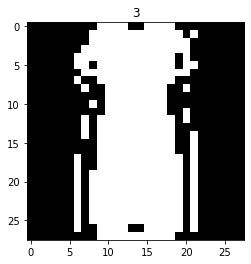

In [ ]:
import matplotlib.pyplot as plt, matplotlib.image as mpimg
i=1
img=train_images.iloc[i].to_numpy()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])

# **We make the image black and white. All non-white pixels will be black.**

Text(0.5, 1.0, '3')

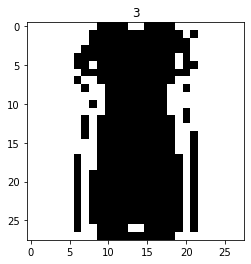

In [ ]:
test_images[test_images>0]=1
train_images[train_images>0]=1

img=train_images.iloc[i].to_numpy().reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(train_labels.iloc[i,0])

# **We reshape the image as 28x28**

Text(0.5, 1.0, '3')

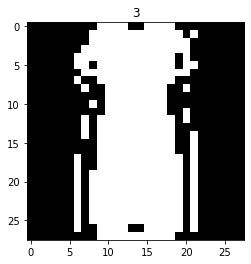

In [ ]:
import matplotlib.pyplot as plt, matplotlib.image as mpimg
i=1
img=train_images.iloc[i].to_numpy()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])

# **Again, the image is black and white.**

Text(0.5, 1.0, '3')

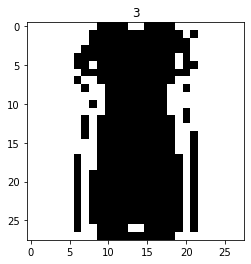

In [ ]:
test_images[test_images>0]=1
train_images[train_images>0]=1

img=train_images.iloc[i].to_numpy().reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(train_labels.iloc[i,0])

# **Feature selection with PCA**

Principal component analysis, or PCA, is a statistical procedure that allows us to summarize the information content in large data tables through a smaller set of "summary indexes" that can be more easily visualized and analyzed.

In [ ]:
from sklearn.decomposition import PCA
n_components = 150;
pca = PCA(svd_solver='randomized', n_components=n_components)
pca.fit(train_images)
train_images_pca = pca.transform(train_images)
test_images_pca = pca.transform(test_images)

# **Classification will be done with SVC (Support Vector Classification). Simulated Annealing will be used as an algorithm**

x0-> 10000.0
x1-> 0.1
accuracy-> 0.822
-------------------------------------------------------------------------------------------------------------------------------------------------
x0-> 10000.417158467137
x1-> 0.19322083874714033
accuracy-> 0.578
-------------------------------------------------------------------------------------------------------------------------------------------------
x0-> 9999.40212748995
x1-> 0.19915477459845737
accuracy-> 0.5626666666666666
-------------------------------------------------------------------------------------------------------------------------------------------------
x0-> 10000.186457710895
x1-> 0.11487996636422237
accuracy-> 0.789
-------------------------------------------------------------------------------------------------------------------------------------------------
x0-> 10001.012674756223
x1-> 0.1632942844546026
accuracy-> 0.6816666666666666
------------------------------------------------------------------------------------------

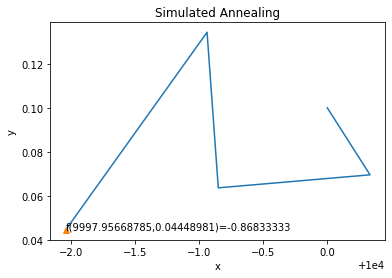

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# kullanılacak fonksiyon
def f(x):
    if x[0] < 0:
        x[0] = 0.0000001
    if x[1] < 0:
        x[1] = 0.0000001

    print(*['x0->', x[0]])
    print(*['x1->', x[1]])
    clf = SVC(kernel='rbf',C=x[0],gamma=x[1],class_weight='balanced')
    clf = clf.fit(train_images_pca, train_labels.values.ravel())
    pred = clf.predict(test_images_pca)
    accuracy = accuracy_score(test_labels, pred)
    print(*['accuracy->', accuracy])
    print("-------------------------------------------------------------------------------------------------------------------------------------------------")
    #print(accuracy)
    return -accuracy

# values
n = 2
iterations = 5
m = 10
radius = 3.0
sigma = 1.0
alpha = 1.0

# başlangıç koşulları
x = np.zeros((iterations,2))
fx = np.zeros(iterations)
x[0] = [10000.0,0.1]
fx[0] = f(x[0])

#iteration
for k in range(0,iterations-1):
    u = np.zeros((m,n))
    count = 0
    while count < m:
        unew = np.zeros(n)
        #for i in range(0,n):
            #unew[i] = np.random.normal(x[k,i],sigma)
        unew[0] = np.random.normal(x[k,0],sigma)
        unew[1] = np.random.normal(x[k,1],sigma/10.0)
        distance = np.sum(np.abs(unew-x[k])**2,axis=-1)**(1./2)
        if distance < radius:
            u[count] = unew
            count += 1

    fu = np.array([f(u_) for u_ in u])
    j = np.argmin(fu)

    # fonksiyon değeri iyileşirse yeni değişkeni kabul ediyoruz
    if fu[j] < fx[k]:
        x[k+1] = u[j]
        fx[k+1] = f(x[k+1])
    else:
        p = np.zeros(m)
        for i in range(0,m):
            p[i] = np.exp(alpha*(fx[k]-fu[i]))
        S = np.sum(p)
        p = p/S
        xi = np.random.rand()
        for i in range(0,m):
            if xi < np.sum(p[:i]):
                x[k+1] = u[i]
                fx[k+1] = f(x[k+1])

bestX = x[np.argmin(fx)]
bestF = np.min(fx)

# we print the changing function values
print(fx)
print(*['Best Variable Result:',bestX ])
print(*['Best Function Result:',bestF ])


description = "f(%3.8f,%3.8f)=%3.8f" % (bestX[0],bestX[1],bestF)
# plot
plt.plot(x[:,0],x[:,1])
plt.title("Simulated Annealing")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(bestX[0],bestX[1],'^')
plt.annotate(description, (bestX[0],bestX[1]))
plt.show()